# EDA on Healthcare Data

Credit: code from https://towardsdatascience.com/step-by-step-exploratory-data-analysis-on-stroke-dataset-840aefea8739 and https://www.kaggle.com/lirilkumaramal/heart-stroke

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [10]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [11]:
# labeled target is unbalanced

In [12]:
# Drop the id column
df.drop(columns=['id'], inplace=True)

In [13]:
# Showing records where patient suffered from stroke but had missing value in bmi attribute.
df[df['bmi'].isna() & df['stroke'] == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
407,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
747,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
1139,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
1613,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
42530,Male,66.0,0,0,Yes,Self-employed,Urban,182.89,NaN,never smoked,1
42839,Female,67.0,1,0,Yes,Govt_job,Urban,234.43,NaN,never smoked,1
43007,Female,69.0,0,1,Yes,Self-employed,Rural,89.19,NaN,smokes,1
43100,Male,67.0,0,0,Yes,Self-employed,Urban,136.79,NaN,smokes,1


In [16]:
# Replace the missing values with mean of bmi attribute
df['bmi'].fillna(np.round(df['bmi'].mean(), 1), inplace = True)

In [17]:
# Create a new category named 'not known'
df['smoking_status'].fillna('not known', inplace=True)
print(df['smoking_status'].value_counts())

never smoked       16053
not known          13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64


In [23]:
# Discretize with respective equal-width bin
df['age_binned'] = pd.cut(df['age'], np.arange(0, 91, 5))
df['avg_glucose_level_binned'] = pd.cut(df['avg_glucose_level'], np.arange(0, 301, 10))
df['bmi_binned'] = pd.cut(df['bmi'], np.arange(0, 101, 5))

<ipython-input-23-b4c4cb89b1bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_binned'] = pd.cut(df['age'], np.arange(0, 91, 5))
<ipython-input-23-b4c4cb89b1bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_glucose_level_binned'] = pd.cut(df['avg_glucose_level'], np.arange(0, 301, 10))
<ipython-input-23-b4c4cb89b1bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

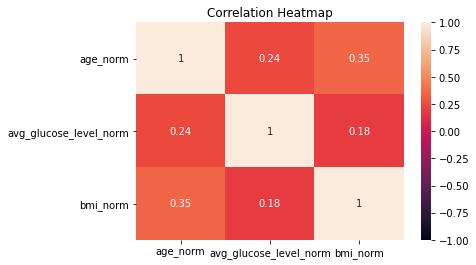

In [24]:
# Create the correlation heatmap
heatmap = sns.heatmap(df[['age_norm', 'avg_glucose_level_norm', 'bmi_norm']].corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap');

In [25]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    df_pct = df.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1);

In [26]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    df_breakdown = df.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    df_total = df.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    df_pct = df_breakdown / df_total * 100
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width);

<AxesSubplot:xlabel='age_binned'>

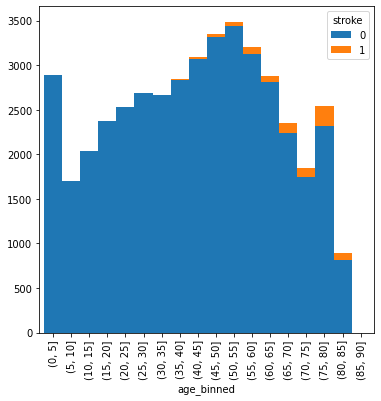

In [28]:
# Age related to risk
get_stacked_bar_chart('age_binned')

<AxesSubplot:xlabel='age_binned'>

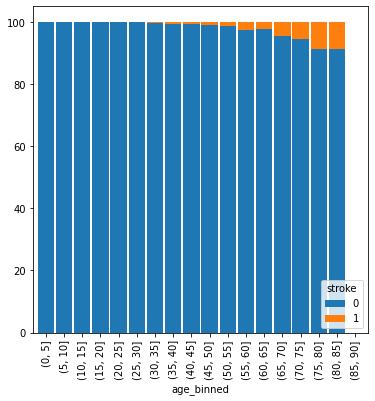

In [29]:
get_100_percent_stacked_bar_chart('age_binned', width = 0.9)

<AxesSubplot:xlabel='bmi_binned'>

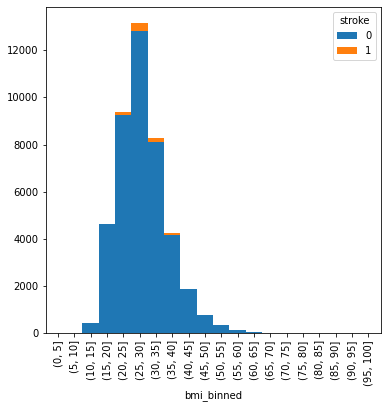

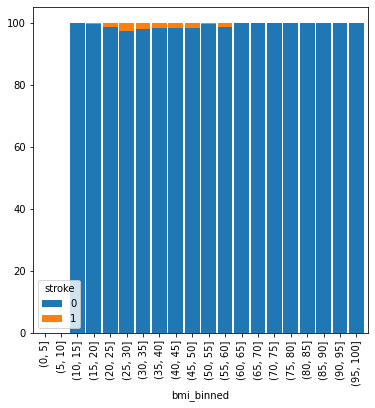

In [30]:
get_stacked_bar_chart('bmi_binned')
get_100_percent_stacked_bar_chart('bmi_binned', width = 0.9)

<AxesSubplot:xlabel='avg_glucose_level_binned'>

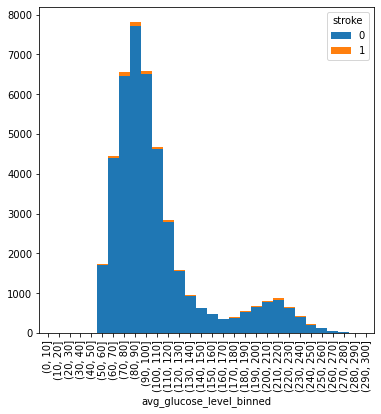

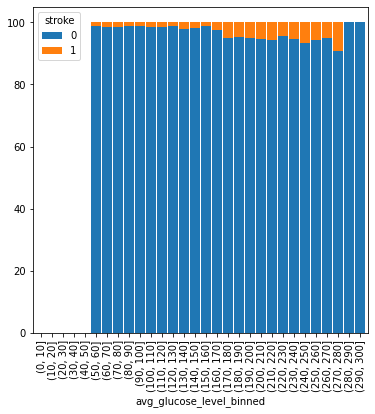

In [31]:
get_stacked_bar_chart('avg_glucose_level_binned')
get_100_percent_stacked_bar_chart('avg_glucose_level_binned', width = 0.9)

<AxesSubplot:xlabel='heart_disease'>

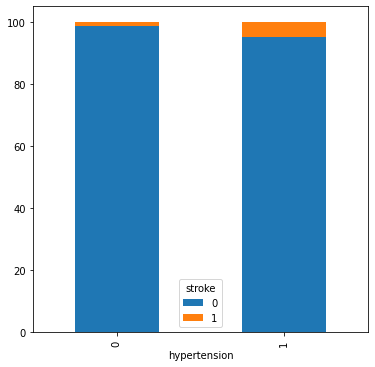

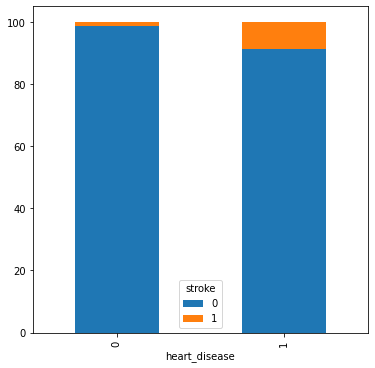

In [32]:
get_100_percent_stacked_bar_chart('hypertension')
get_100_percent_stacked_bar_chart('heart_disease')

<AxesSubplot:xlabel='Residence_type'>

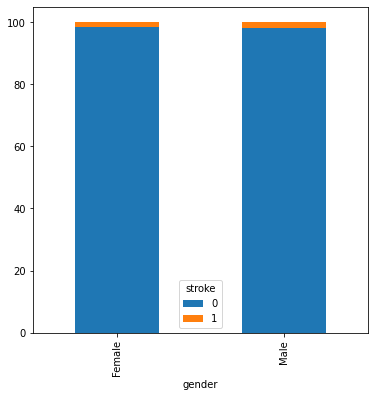

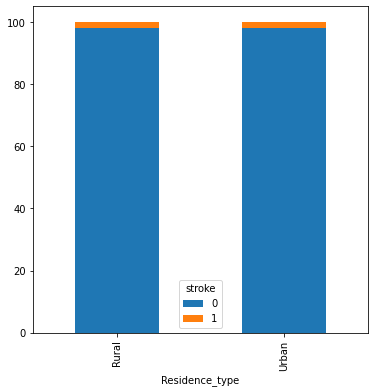

In [33]:
get_100_percent_stacked_bar_chart('gender')
get_100_percent_stacked_bar_chart('Residence_type')

age           
               count       mean
work_type                      
Govt_job        5438  49.098750
Never_worked     177  17.757062
Private        24827  45.016837
Self-employed   6793  59.307817
children        6154   6.698018

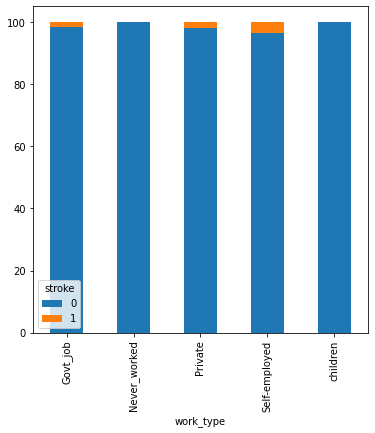

In [34]:
get_100_percent_stacked_bar_chart('work_type')
df.groupby(['work_type'])[['age']].agg(['count', 'mean'])

age           
              count       mean
ever_married                  
No            15456  21.237487
Yes           27933  53.829735

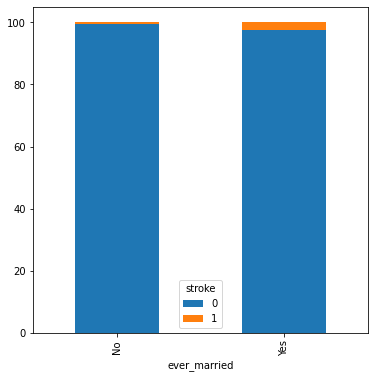

In [35]:
get_100_percent_stacked_bar_chart('ever_married')
df.groupby(['ever_married'])[['age']].agg(['count', 'mean'])

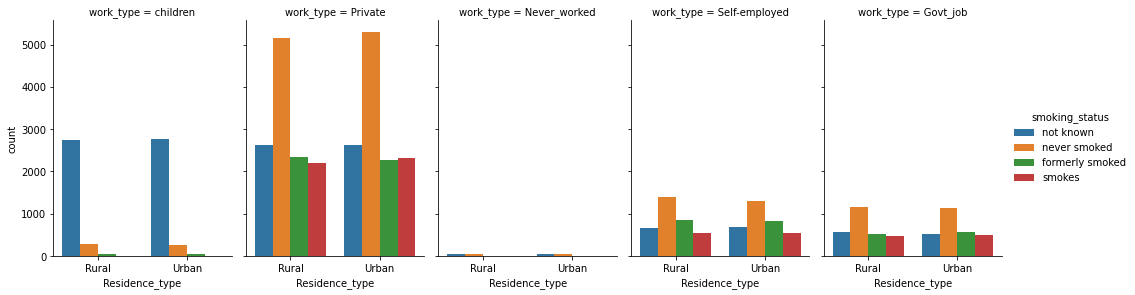

In [37]:
g = sns.catplot(x="Residence_type", hue="smoking_status", col="work_type",
                data=df, kind="count",
                height=4, aspect=.7)

In [38]:
missingno.matrix(df, figsize = (30,5))

NameError: name 'missingno' is not defined

<AxesSubplot:xlabel='hypertension', ylabel='count'>

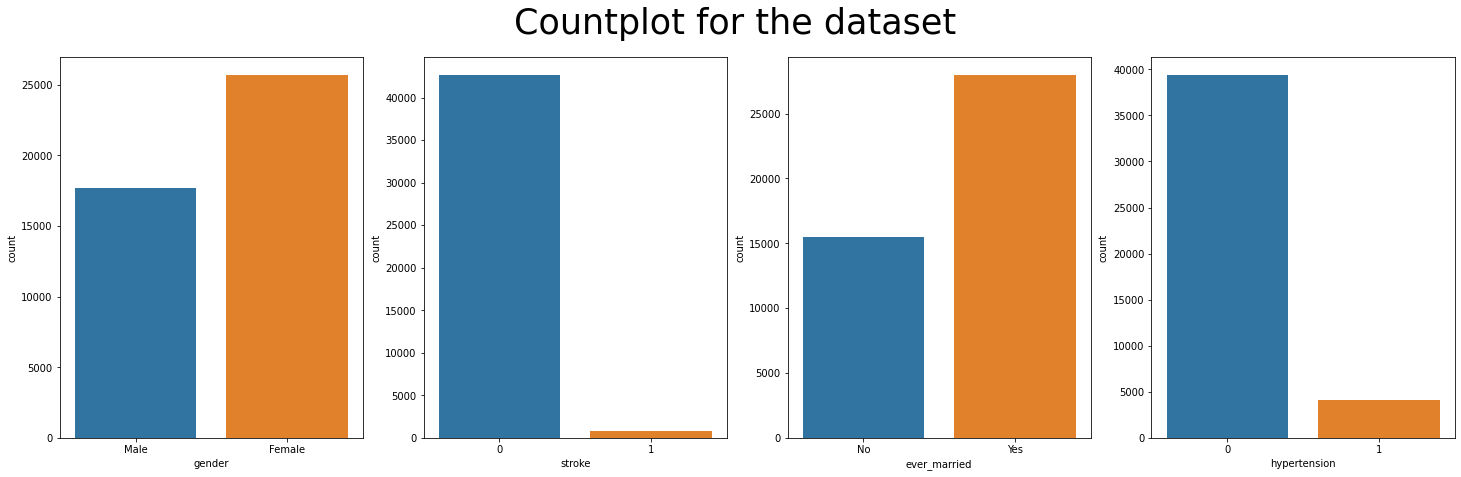

In [40]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,7))

fig.suptitle("Countplot for the dataset", fontsize=35)

sns.countplot(x="gender", data=df,ax=ax1)
sns.countplot(x="stroke", data=df,ax=ax2)
sns.countplot(x="ever_married", data=df,ax=ax3)
sns.countplot(x="hypertension", data=df,ax=ax4)

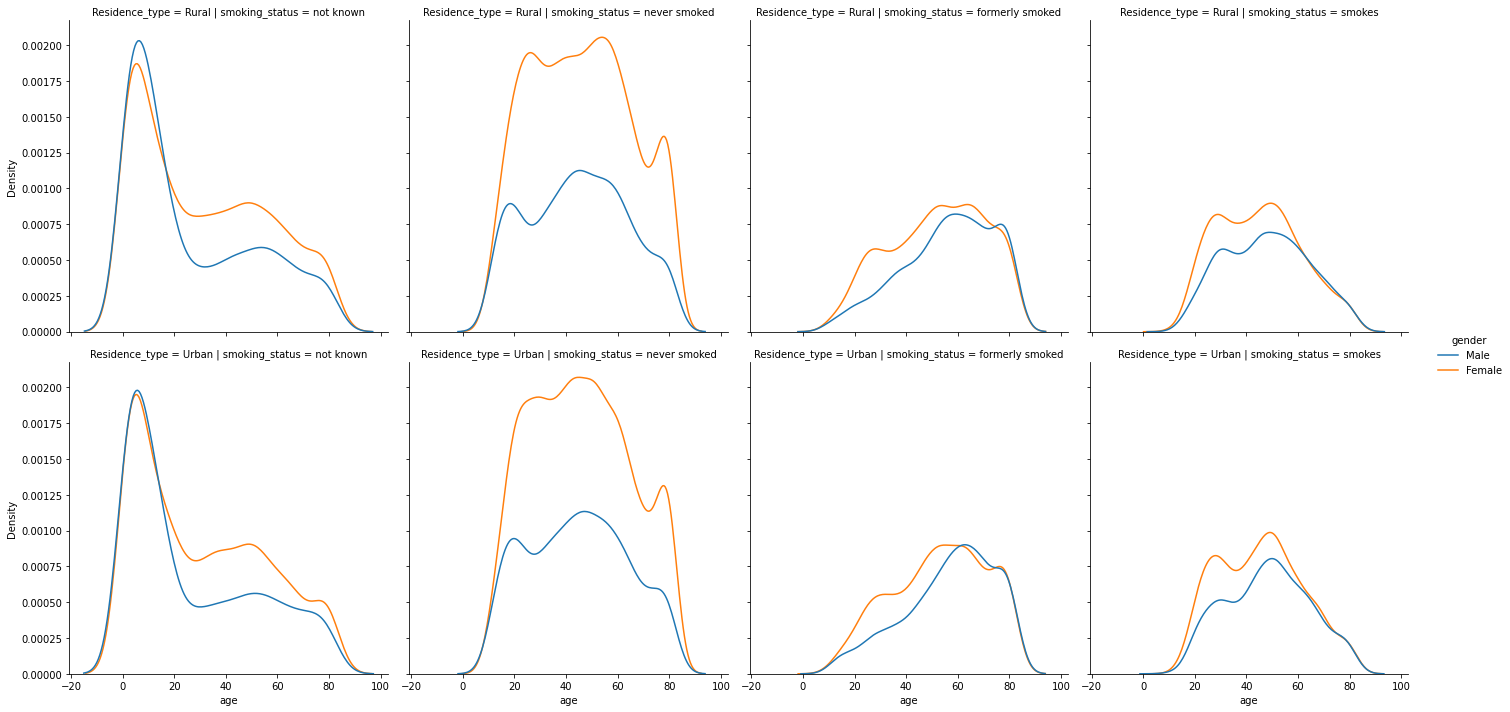

In [41]:
sns.displot(x="age", data=df, kind="kde", hue="gender", col="smoking_status", row="Residence_type")

<AxesSubplot:xlabel='stroke', ylabel='age'>

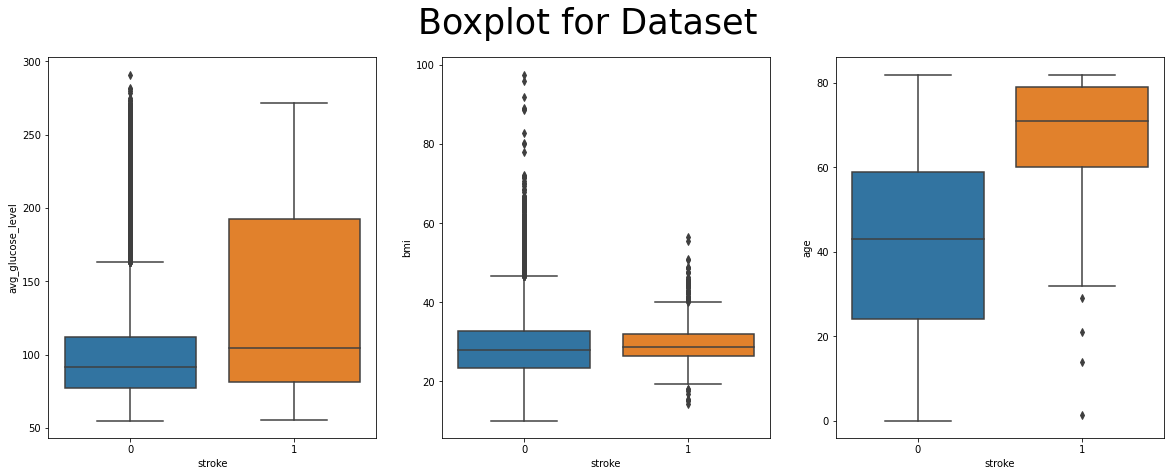

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))
fig.suptitle("Boxplot for Dataset", fontsize=35)

sns.boxplot(x="stroke", y="avg_glucose_level", data=df,ax=ax1)
sns.boxplot(x="stroke", y="bmi", data=df,ax=ax2)
sns.boxplot(x="stroke", y="age", data=df,ax=ax3)

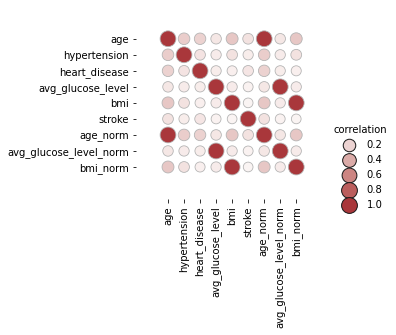

In [47]:
# Compute a correlation matrix and convert to long-form
corr_mat = df.corr("kendall").stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=5, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(0.25)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".1")

In [52]:
strokes_temp_df=df
strokes_temp_df[['stroke','hypertension']] = df[['stroke','hypertension']].astype('int')
corr = strokes_temp_df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_norm,avg_glucose_level_norm,bmi_norm
age,1.00,0.27,0.25,0.24,0.35,0.16,1.00,0.24,0.35
hypertension,0.27,1.00,0.12,0.16,0.15,0.08,0.27,0.16,0.15
heart_disease,0.25,0.12,1.00,0.15,0.05,0.11,0.25,0.15,0.05
avg_glucose_level,0.24,0.16,0.15,1.00,0.18,0.08,0.24,1.00,0.18
bmi,0.35,0.15,0.05,0.18,1.00,0.02,0.35,0.18,1.00
stroke,0.16,0.08,0.11,0.08,0.02,1.00,0.16,0.08,0.02
age_norm,1.00,0.27,0.25,0.24,0.35,0.16,1.00,0.24,0.35
avg_glucose_level_norm,0.24,0.16,0.15,1.00,0.18,0.08,0.24,1.00,0.18
bmi_norm,0.35,0.15,0.05,0.18,1.00,0.02,0.35,0.18,1.00
